# ML class final project part1
##  Almog Shor
## Yehudit Brickner

imports

In [22]:
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import time
import pickle
from collections import Counter

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

create the data set with all of the features

In [2]:
def create_df1(folder):

    folder_dir= os.listdir(folder)
    
    big_list=[]
    my_list=[]
    count=0
    c=0
    for i in folder_dir:
        print(i)
        j = os.listdir(folder+"/"+i)
        for k in range(len(j)):
            try:
                img = cv2.imread(folder+"/"+i+"/"+j[k], cv2.COLOR_BGR2RGB)
                img = cv2.resize(img,(200,200), interpolation = cv2.INTER_AREA)
                
                histogram_r, bin_edges = np.histogram(img[:, :, 0], bins=256, range=(0, 256)) 
                histogram_g, bin_edges = np.histogram(img[:, :, 1], bins=256, range=(0, 256)) 
                histogram_b, bin_edges = np.histogram(img[:, :, 2], bins=256, range=(0, 256)) 
                
                dst = cv2.Canny(img, 50, 200, None, 3)
                dst1 = cv2.Canny(img, 50, 200, None, 3)
                lines = cv2.HoughLines(dst1, 1, np.pi / 180, 50, None, 0, 0)
                
                gray = cv2.imread(folder+"/"+i+"/"+j[k],cv2.IMREAD_GRAYSCALE)
                gray =  cv2.resize(gray,(200,200), interpolation = cv2.INTER_AREA)
                gray = cv2.medianBlur(gray, 5)
                rows = gray.shape[0]
                circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
                                param1=100, param2=30,
                                minRadius=10, maxRadius=100)
                
                my_list=[]
                my_list.append(folder+"/"+i+"/"+j[k])
                my_list.append(i)
                my_list.append(c)
                if lines is None:
                    my_list.append(0)
                    my_list.append(0)   
                else:
                    my_list.append(1)
                    my_list.append(len(lines))
                if circles is None:
                    my_list.append(0)
                    my_list.append(0)   
                else:
                    my_list.append(1)
                    my_list.append(circles.shape[1])
                
                my_list.extend(histogram_r)
                my_list.extend(histogram_g)
                my_list.extend(histogram_b)
                # my_list.extend(img.flatten())
                # my_list.extend(dst.flatten())

                big_list.append(my_list)
                count+=1
                
            except:
                print("there was an error with count ",count)

        c+=1

    
    print("creating df")
    cols = ['path','class_name','class_number','lines?','#lines','circles?','#circles']
    for h in range(256):
        cols.append("r"+str(h))
    for h in range(256):
        cols.append("g"+str(h))
    for h in range(256):
        cols.append("b"+str(h))
    # for h in range(200*200*3):
    #     cols.append("i"+str(h))
    # for h in range(200*200):
    #     cols.append("e"+str(h))

    df = pd.DataFrame(big_list, columns = cols) 

    print("created df")
              
    return df

In [52]:
# folder ="C:/Users/nechd/Downloads/ball_classification/train"
# start_time = time.time()
# full_ball_df = create_df1(folder) 
# end_time = time.time()
# print("time taken: ",end_time - start_time)

In [53]:
# full_ball_df.shape
# full_ball_df.head()

In [54]:
# full_ball_df.to_csv('small_hist.csv', index=False)

In [3]:
# folder ="C:/Users/nechd/Downloads/ball_classification/test"
# start_time = time.time()
# full_test_df = create_df1(folder) 
# end_time = time.time()
# print("time taken: ",end_time - start_time)

american_football
baseball
basketball
there was an error with count  213
billiard_ball
bowling_ball
cricket_ball
there was an error with count  610
football
there was an error with count  767
there was an error with count  793
golf_ball
there was an error with count  950
hockey_ball
hockey_puck
there was an error with count  1181
rugby_ball
there was an error with count  1277
there was an error with count  1319
shuttlecock
there was an error with count  1395
there was an error with count  1425
there was an error with count  1442
table_tennis_ball
tennis_ball
volleyball
there was an error with count  1730
there was an error with count  1799
creating df
created df
time taken:  37.214224100112915


In [4]:
# full_test_df.to_csv('final_test_data_small_hist.csv', index=False)

import the data with some/all features

In [5]:
small_hist = pd.read_csv('small_hist.csv')
del small_hist['path']
del small_hist['class_name']
ball_type = [0,2,9,11]
small_hist_4balls = small_hist.loc[small_hist['class_number'].isin(ball_type)]
small_hist_4balls.shape

(1533, 773)

In [6]:

X1 = small_hist_4balls.iloc[:,2:6]
X2 = small_hist_4balls.iloc[:,5:] 
X3 = small_hist_4balls.drop(['class_number'], axis=1)

y = small_hist_4balls['class_number']

train test split

In [7]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.3, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.3, random_state=42)


extra functions

In [8]:
# function to represent the confusion matrix nicely
def Confusion_Matrix(cf_matrix):
    plt.figure(figsize=(6,6))
    sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Greens')

In [63]:
# list to hold all final results
results=[]

model imports

In [9]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression


from sklearn.decomposition import PCA

# RUN ON DATA SET WITH LINES AND CIRCLES 

#### SVM

In [112]:
losses = ["hinge","squared_hinge"]
penalties = ["l1","l2"]

print("OneVsOneClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsOneClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train1, y_train1)
            pred_svm = svm.predict(X_test1)
            print(i,j,round(np.sum([y_test1==pred_svm])/len(y_test1),4)*100,"%")
        except:
            pass

print("OutputCodeClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OutputCodeClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train1, y_train1)
            pred_svm = svm.predict(X_test1)
            print(i,j,round(np.sum([y_test1==pred_svm])/len(y_test1),4)*100,"%")
        except:
            pass


print("OneVsRestClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsRestClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train1, y_train1)
            pred_svm = svm.predict(X_test1)
            print(i,j,round(np.sum([y_test1==pred_svm])/len(y_test1),4)*100,"%")
        except:
            pass

OneVsOneClassifier
hinge l2 31.52 %
squared_hinge l2 38.04 %
OutputCodeClassifier
hinge l2 30.65 %
squared_hinge l2 25.869999999999997 %
OneVsRestClassifier
hinge l2 26.3 %
squared_hinge l2 36.96 %


              precision    recall  f1-score   support

           0       0.23      0.21      0.22       110
           2       0.62      0.15      0.24       100
           9       0.47      0.37      0.41       111
          11       0.38      0.69      0.49       139

    accuracy                           0.38       460
   macro avg       0.43      0.35      0.34       460
weighted avg       0.42      0.38      0.35       460

38.04 %


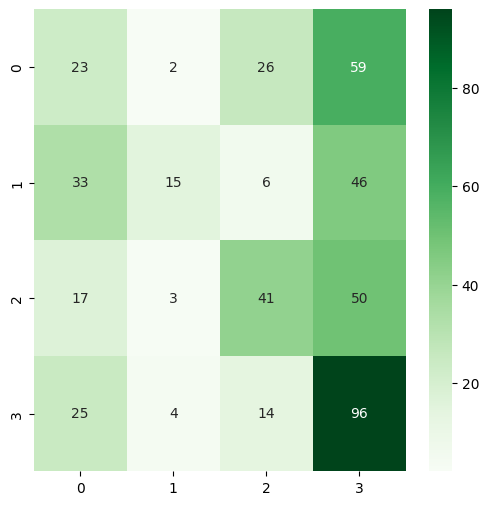

In [113]:
svm1 =  OneVsOneClassifier(LinearSVC(random_state=0, loss="squared_hinge",penalty="l2")).fit(X_train1, y_train1)
pred_svm1 = svm1.predict(X_test1)
Confusion_Matrix(confusion_matrix(y_test1,pred_svm1))
print(classification_report(y_test1, pred_svm1))
print(round(np.sum([y_test1==pred_svm1])/len(y_test1),4)*100,"%")
results.append(['lines and circles', 'SVM',round(np.sum([y_test1==pred_svm1])/len(y_test1),4)*100 ])

#### KNN

In [67]:
for i in range(1,51):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train1,y_train1)
    pred_knn = neigh.predict(X_test1)
    print(i,round(np.sum([y_test1==pred_knn])/len(y_test1),4)*100,"%")

1 35.43 %
2 33.910000000000004 %
3 36.74 %
4 36.52 %
5 35.22 %
6 36.52 %
7 35.870000000000005 %
8 37.39 %
9 36.52 %
10 36.74 %
11 36.96 %
12 37.169999999999995 %
13 35.22 %
14 35.870000000000005 %
15 36.3 %
16 36.3 %
17 37.830000000000005 %
18 37.169999999999995 %
19 39.57 %
20 36.74 %
21 37.830000000000005 %
22 35.870000000000005 %
23 35.870000000000005 %
24 37.830000000000005 %
25 34.57 %
26 34.57 %
27 36.09 %
28 35.870000000000005 %
29 34.57 %
30 34.57 %
31 36.74 %
32 36.09 %
33 36.3 %
34 37.39 %
35 36.96 %
36 37.61 %
37 37.39 %
38 37.830000000000005 %
39 36.09 %
40 36.09 %
41 37.169999999999995 %
42 37.169999999999995 %
43 36.74 %
44 37.169999999999995 %
45 37.830000000000005 %
46 36.96 %
47 38.26 %
48 37.39 %
49 37.61 %
50 37.830000000000005 %


              precision    recall  f1-score   support

           0       0.33      0.38      0.35       110
           2       0.31      0.28      0.29       100
           9       0.44      0.36      0.40       111
          11       0.47      0.52      0.49       139

    accuracy                           0.40       460
   macro avg       0.39      0.39      0.39       460
weighted avg       0.40      0.40      0.39       460

39.57 %


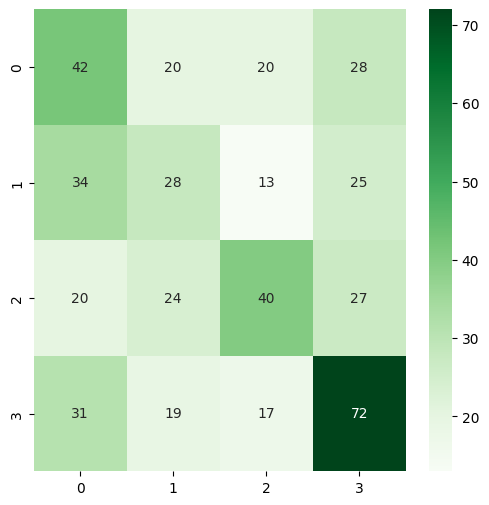

In [68]:
neigh1 = KNeighborsClassifier(n_neighbors=19)
neigh1.fit(X_train1,y_train1)
pred_knn1 = neigh1.predict(X_test1)
Confusion_Matrix(confusion_matrix(y_test1,pred_knn1))
print(classification_report(y_test1, pred_knn1))
print(round(np.sum([y_test1==pred_knn1])/len(y_test1),4)*100,"%")
results.append(['lines and circles', 'KNN',round(np.sum([y_test1==pred_knn1])/len(y_test1),4)*100 ])

#### Adaboost

In [69]:
for i in range(50,2001,50):
    ada = AdaBoostClassifier(n_estimators=i, algorithm="SAMME", random_state=0)
    ada.fit(X_train1,y_train1)
    pred_ada = ada.predict(X_test1)
    print(i,round(np.sum([y_test1==pred_ada])/len(y_test1),4)*100,"%")

50 40.65 %
100 42.61 %
150 42.17 %
200 41.74 %
250 41.3 %
300 41.52 %
350 41.959999999999994 %
400 41.52 %
450 41.74 %
500 42.39 %
550 42.83 %
600 41.089999999999996 %
650 40.87 %
700 41.089999999999996 %
750 40.43 %
800 41.3 %
850 41.52 %
900 41.74 %
950 42.61 %
1000 41.74 %
1050 41.089999999999996 %
1100 43.04 %
1150 41.74 %
1200 42.17 %
1250 42.61 %
1300 42.61 %
1350 42.39 %
1400 42.61 %
1450 42.39 %
1500 41.959999999999994 %
1550 41.959999999999994 %
1600 41.74 %
1650 42.17 %
1700 42.17 %
1750 43.26 %
1800 43.04 %
1850 42.39 %
1900 43.26 %
1950 43.04 %
2000 42.61 %


              precision    recall  f1-score   support

           0       0.32      0.35      0.33       110
           2       0.40      0.50      0.45       100
           9       0.47      0.41      0.43       111
          11       0.56      0.47      0.51       139

    accuracy                           0.43       460
   macro avg       0.44      0.43      0.43       460
weighted avg       0.44      0.43      0.44       460

43.26 %


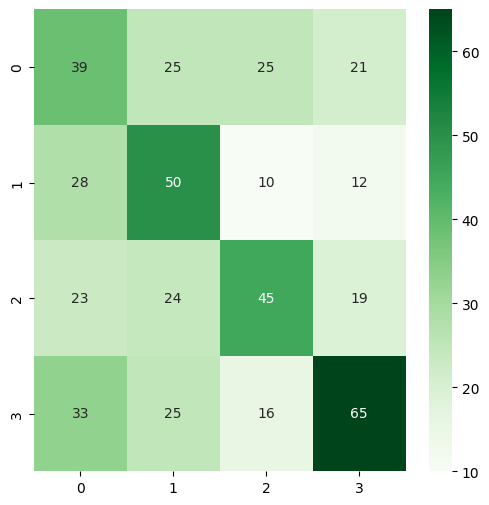

In [70]:
ada1 = AdaBoostClassifier(n_estimators=1750, algorithm="SAMME",random_state=0)
ada1.fit(X_train1,y_train1)
pred_ada1 = ada1.predict(X_test1)
Confusion_Matrix(confusion_matrix(y_test1,pred_ada1))
print(classification_report(y_test1, pred_ada1))
print(round(np.sum([y_test1==pred_ada1])/len(y_test1),4)*100,"%")
results.append(['lines and circles', 'Adaboost',round(np.sum([y_test1==pred_ada1])/len(y_test1),4)*100 ])

#### Random Forest

In [71]:
for i in range(40,501,20):
    for j in range(2,5):
        RF = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=j, random_state=0)
        RF.fit(X_train1,y_train1)
        pred_RF = RF.predict(X_test1)
        print(i,j,round(np.sum([y_test1==pred_RF])/len(y_test1),4)*100,"%")

40 2 42.61 %
40 3 41.52 %
40 4 40.0 %
60 2 42.17 %
60 3 41.959999999999994 %
60 4 42.83 %
80 2 41.52 %
80 3 43.04 %
80 4 42.61 %
100 2 41.74 %
100 3 42.83 %
100 4 41.74 %
120 2 41.74 %
120 3 42.61 %
120 4 42.17 %
140 2 41.74 %
140 3 41.959999999999994 %
140 4 41.74 %
160 2 42.17 %
160 3 41.52 %
160 4 41.089999999999996 %
180 2 41.959999999999994 %
180 3 41.74 %
180 4 41.3 %
200 2 42.17 %
200 3 42.61 %
200 4 41.089999999999996 %
220 2 42.17 %
220 3 41.959999999999994 %
220 4 40.87 %
240 2 41.959999999999994 %
240 3 42.39 %
240 4 40.87 %
260 2 42.17 %
260 3 42.39 %
260 4 40.65 %
280 2 41.959999999999994 %
280 3 42.17 %
280 4 41.089999999999996 %
300 2 42.17 %
300 3 42.61 %
300 4 41.089999999999996 %
320 2 41.74 %
320 3 42.83 %
320 4 40.87 %
340 2 41.74 %
340 3 42.61 %
340 4 41.3 %
360 2 42.17 %
360 3 42.39 %
360 4 40.87 %
380 2 41.74 %
380 3 42.39 %
380 4 40.87 %
400 2 41.52 %
400 3 42.83 %
400 4 41.089999999999996 %
420 2 41.959999999999994 %
420 3 42.83 %
420 4 40.65 %
440 2 42.17 %
44

              precision    recall  f1-score   support

           0       0.30      0.28      0.29       110
           2       0.47      0.48      0.48       100
           9       0.41      0.41      0.41       111
          11       0.51      0.53      0.52       139

    accuracy                           0.43       460
   macro avg       0.42      0.42      0.42       460
weighted avg       0.43      0.43      0.43       460

43.04 %


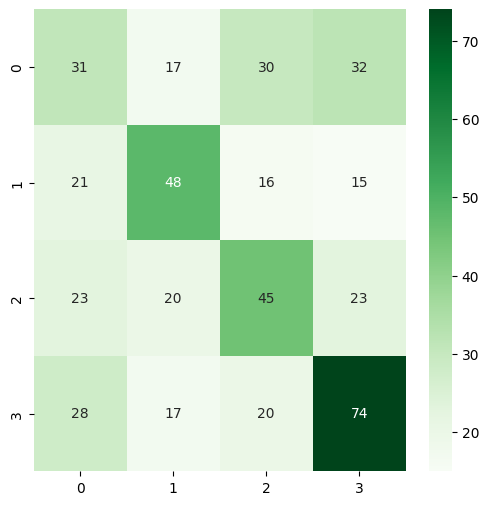

In [72]:
RF1 = RandomForestClassifier(n_estimators=80, max_depth=None,min_samples_split=3, random_state=0)
RF1.fit(X_train1,y_train1)
pred_RF1 = RF1.predict(X_test1)
Confusion_Matrix(confusion_matrix(y_test1,pred_RF1))
print(classification_report(y_test1, pred_RF1))
print(round(np.sum([y_test1==pred_RF1])/len(y_test1),4)*100,"%")
results.append(['lines and circles', 'Random Forest',round(np.sum([y_test1==pred_RF1])/len(y_test1),4)*100 ])

#### Logistic Regression

In [73]:
penilties = ["l1","l2","elasticnet"]
solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
tols= [0.1 ,0.01, 0.001]

for i in penilties:
    for j in solvers:
        for k in tols:
            try:
                LR = LogisticRegression(penalty=i, solver=j, tol=k, max_iter=10000,random_state=0)
                LR.fit(X_train1,y_train1)
                pred_LR = LR.predict(X_test1)
                print(i,j,k,round(np.sum([y_test1==pred_LR])/len(y_test1),4)*100,"%")
            except:
                pass
        

l1 liblinear 0.1 37.169999999999995 %
l1 liblinear 0.01 33.040000000000006 %
l1 liblinear 0.001 32.17 %
l1 saga 0.1 24.57 %
l1 saga 0.01 24.57 %


l1 saga 0.001 28.26 %
l2 lbfgs 0.1 31.52 %
l2 lbfgs 0.01 31.52 %
l2 lbfgs 0.001 31.52 %
l2 liblinear 0.1 25.0 %
l2 liblinear 0.01 27.61 %
l2 liblinear 0.001 32.39 %
l2 newton-cg 0.1 31.3 %
l2 newton-cg 0.01 31.3 %
l2 newton-cg 0.001 31.3 %
l2 sag 0.1 24.57 %
l2 sag 0.01 26.3 %
l2 sag 0.001 29.349999999999998 %
l2 saga 0.1 24.57 %
l2 saga 0.01 24.57 %
l2 saga 0.001 28.26 %


              precision    recall  f1-score   support

           0       0.28      0.49      0.36       110
           2       0.39      0.72      0.51       100
           9       0.00      0.00      0.00       111
          11       0.54      0.32      0.40       139

    accuracy                           0.37       460
   macro avg       0.30      0.38      0.32       460
weighted avg       0.31      0.37      0.32       460

37.169999999999995 %


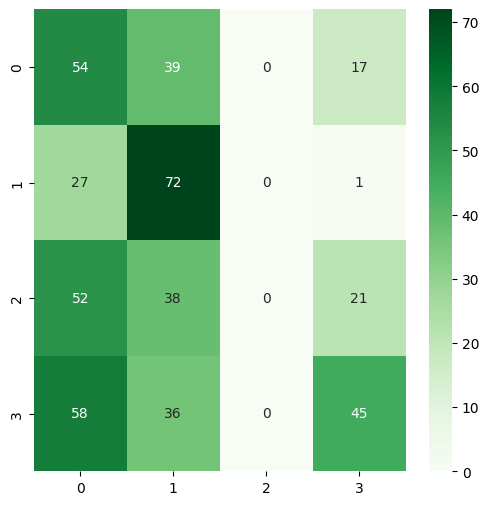

In [74]:
LR1 = LogisticRegression(penalty="l1", solver="liblinear", tol=0.1, max_iter=10000, random_state=0)
LR1.fit(X_train1,y_train1)
pred_LR1 = LR1.predict(X_test1)
Confusion_Matrix(confusion_matrix(y_test1,pred_LR1))
print(classification_report(y_test1, pred_LR1))
print(round(np.sum([y_test1==pred_LR1])/len(y_test1),4)*100,"%")
results.append(['lines and circles', 'Logistic Regression',round(np.sum([y_test1==pred_LR1])/len(y_test1),4)*100 ])

# RUN ON DATA SET WITH HISTOGRAM DATA

#### SVM

In [116]:
losses = ["hinge","squared_hinge"]
penalties = ["l1","l2"]

print("OneVsOneClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsOneClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train2, y_train2)
            pred_svm = svm.predict(X_test2)
            print(i,j,round(np.sum([y_test2==pred_svm])/len(y_test2),4)*100,"%")
        except:
            pass

print("OutputCodeClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OutputCodeClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train2, y_train2)
            pred_svm = svm.predict(X_test2)
            print(i,j,round(np.sum([y_test2==pred_svm])/len(y_test2),4)*100,"%")
        except:
            pass


print("OneVsRestClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsRestClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train2, y_train2)
            pred_svm = svm.predict(X_test2)
            print(i,j,round(np.sum([y_test2==pred_svm])/len(y_test2),4)*100,"%")
        except:
            pass

OneVsOneClassifier


hinge l2 48.699999999999996 %
squared_hinge l2 48.699999999999996 %
OutputCodeClassifier
hinge l2 47.39 %
squared_hinge l2 45.65 %
OneVsRestClassifier
hinge l2 42.83 %
squared_hinge l2 42.83 %


              precision    recall  f1-score   support

           0       0.41      0.55      0.47       110
           2       0.44      0.42      0.43       100
           9       0.40      0.30      0.34       111
          11       0.66      0.63      0.65       139

    accuracy                           0.49       460
   macro avg       0.48      0.48      0.47       460
weighted avg       0.49      0.49      0.48       460

48.699999999999996 %


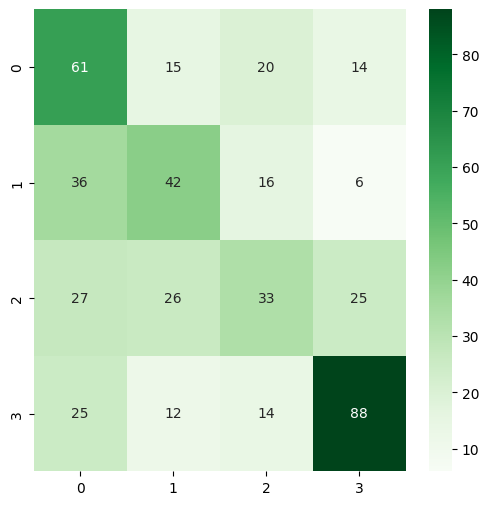

In [117]:
svm2 =  OneVsOneClassifier(LinearSVC(random_state=0, loss="hinge",penalty="l2")).fit(X_train2, y_train2)
pred_svm2 = svm2.predict(X_test2)
Confusion_Matrix(confusion_matrix(y_test2,pred_svm2))
print(classification_report(y_test2, pred_svm2))
print(round(np.sum([y_test2==pred_svm2])/len(y_test2),4)*100,"%")
results.append(['histogram', 'SVM',round(np.sum([y_test2==pred_svm2])/len(y_test2),4)*100 ])

#### KNN

In [77]:
for i in range(1,51):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train2,y_train2)
    pred_knn = neigh.predict(X_test2)
    print(i,round(np.sum([y_test2==pred_knn])/len(y_test2),4)*100,"%")

1 53.480000000000004 %
2 45.43 %
3 49.78 %
4 48.480000000000004 %
5 48.04 %
6 49.57 %
7 49.78 %
8 48.91 %
9 48.91 %
10 47.61 %
11 48.699999999999996 %
12 47.17 %
13 47.39 %
14 47.83 %
15 47.83 %
16 48.91 %
17 46.96 %
18 46.96 %
19 47.61 %
20 47.83 %
21 46.300000000000004 %
22 45.65 %
23 45.22 %
24 46.96 %
25 47.17 %
26 47.83 %
27 46.300000000000004 %
28 46.300000000000004 %
29 46.739999999999995 %
30 46.300000000000004 %
31 46.300000000000004 %
32 46.52 %
33 46.52 %
34 46.96 %
35 45.65 %
36 45.43 %
37 44.57 %
38 43.91 %
39 43.91 %
40 43.91 %
41 44.57 %
42 41.959999999999994 %
43 43.04 %
44 43.7 %
45 43.91 %
46 42.83 %
47 42.17 %
48 43.91 %
49 43.04 %
50 42.83 %


              precision    recall  f1-score   support

           0       0.39      0.65      0.49       110
           2       0.50      0.47      0.48       100
           9       0.45      0.28      0.34       111
          11       0.71      0.57      0.63       139

    accuracy                           0.50       460
   macro avg       0.51      0.49      0.49       460
weighted avg       0.52      0.50      0.50       460

49.78 %


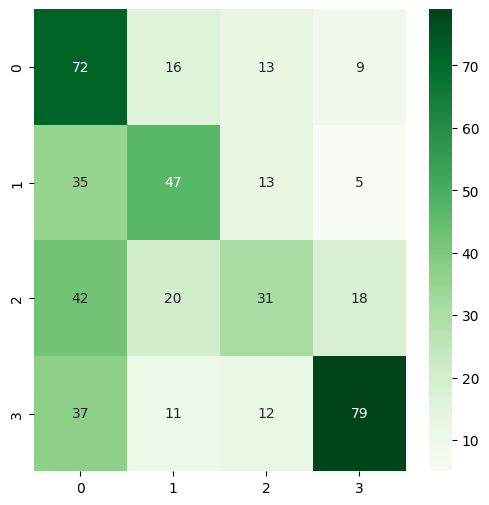

In [78]:
neigh2 = KNeighborsClassifier(n_neighbors=3)
neigh2.fit(X_train2,y_train2)
pred_knn2 = neigh2.predict(X_test2)
Confusion_Matrix(confusion_matrix(y_test2,pred_knn2))
print(classification_report(y_test2, pred_knn2))
print(round(np.sum([y_test2==pred_knn2])/len(y_test2),4)*100,"%")
results.append(['histogram', 'KNN',round(np.sum([y_test2==pred_knn2])/len(y_test2),4)*100 ])

#### Adaboost

In [79]:
for i in range(50,2001,50):
    ada = AdaBoostClassifier(n_estimators=i, algorithm="SAMME", random_state=0)
    ada.fit(X_train2,y_train2)
    pred_ada = ada.predict(X_test2)
    print(i,round(np.sum([y_test2==pred_ada])/len(y_test2),4)*100,"%")

50 55.65 %
100 59.78 %
150 59.78 %
200 58.26 %
250 58.26 %
300 58.26 %
350 58.26 %
400 58.48 %
450 58.26 %
500 58.26 %
550 57.60999999999999 %
600 57.60999999999999 %
650 58.26 %
700 58.040000000000006 %
750 59.35 %
800 58.48 %
850 58.699999999999996 %
900 58.699999999999996 %
950 58.699999999999996 %
1000 59.35 %
1050 58.699999999999996 %
1100 58.48 %
1150 59.13 %
1200 58.91 %
1250 59.78 %
1300 59.57 %
1350 59.57 %
1400 60.0 %
1450 59.57 %
1500 59.78 %
1550 59.35 %
1600 58.699999999999996 %
1650 58.48 %
1700 58.91 %
1750 58.48 %
1800 58.699999999999996 %
1850 59.13 %
1900 58.91 %
1950 59.13 %
2000 59.13 %


              precision    recall  f1-score   support

           0       0.60      0.67      0.64       110
           2       0.55      0.52      0.53       100
           9       0.52      0.55      0.54       111
          11       0.71      0.64      0.67       139

    accuracy                           0.60       460
   macro avg       0.60      0.60      0.59       460
weighted avg       0.60      0.60      0.60       460

60.0 %


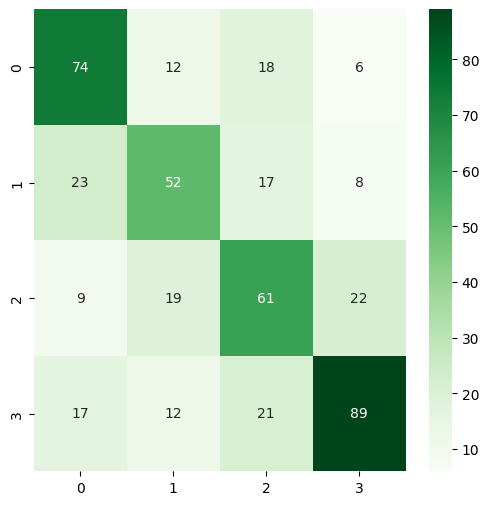

In [80]:
ada2 = AdaBoostClassifier(n_estimators=1400, algorithm="SAMME",random_state=0)
ada2.fit(X_train2,y_train2)
pred_ada2 = ada2.predict(X_test2)
Confusion_Matrix(confusion_matrix(y_test2,pred_ada2))
print(classification_report(y_test2, pred_ada2))
print(round(np.sum([y_test2==pred_ada2])/len(y_test2),4)*100,"%")
results.append(['histogram', 'Adaboost',round(np.sum([y_test2==pred_ada2])/len(y_test2),4)*100 ])

#### Random Forset

In [81]:
for i in range(40,501,20):
    for j in range(2,5):
        RF = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=j, random_state=0)
        RF.fit(X_train2,y_train2)
        pred_RF = RF.predict(X_test2)
        print(i,j,round(np.sum([y_test2==pred_RF])/len(y_test2),4)*100,"%")

40 2 65.86999999999999 %
40 3 64.13 %
40 4 65.42999999999999 %
60 2 66.74 %
60 3 66.09 %
60 4 65.86999999999999 %
80 2 66.3 %
80 3 65.42999999999999 %
80 4 65.42999999999999 %
100 2 66.74 %
100 3 66.09 %
100 4 65.22 %
120 2 66.74 %
120 3 66.3 %
120 4 65.64999999999999 %
140 2 67.17 %
140 3 67.39 %
140 4 65.64999999999999 %
160 2 66.3 %
160 3 66.96 %
160 4 65.22 %
180 2 67.17 %
180 3 66.3 %
180 4 65.86999999999999 %
200 2 67.17 %
200 3 66.3 %
200 4 66.3 %
220 2 67.39 %
220 3 66.96 %
220 4 65.42999999999999 %
240 2 66.96 %
240 3 67.39 %
240 4 66.3 %
260 2 67.61 %
260 3 67.39 %
260 4 65.86999999999999 %
280 2 67.17 %
280 3 67.17 %
280 4 66.09 %
300 2 66.74 %
300 3 67.17 %
300 4 65.86999999999999 %
320 2 66.74 %
320 3 67.17 %
320 4 66.09 %
340 2 67.17 %
340 3 67.61 %
340 4 66.52 %
360 2 66.74 %
360 3 67.17 %
360 4 66.09 %
380 2 66.52 %
380 3 67.17 %
380 4 66.3 %
400 2 66.74 %
400 3 67.17 %
400 4 66.96 %
420 2 66.96 %
420 3 67.83 %
420 4 66.96 %
440 2 66.74 %
440 3 67.17 %
440 4 66.74 %
460

              precision    recall  f1-score   support

           0       0.66      0.75      0.71       110
           2       0.71      0.62      0.66       100
           9       0.59      0.62      0.61       111
          11       0.73      0.69      0.71       139

    accuracy                           0.67       460
   macro avg       0.67      0.67      0.67       460
weighted avg       0.68      0.67      0.67       460

67.39 %


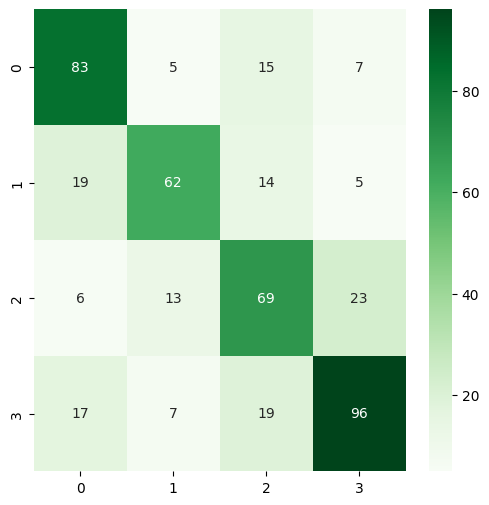

In [82]:
RF2 = RandomForestClassifier(n_estimators=140, max_depth=None,min_samples_split=3, random_state=0)
RF2.fit(X_train2,y_train2)
pred_RF2 = RF2.predict(X_test2)
Confusion_Matrix(confusion_matrix(y_test2,pred_RF2))
print(classification_report(y_test2, pred_RF2))
print(round(np.sum([y_test2==pred_RF2])/len(y_test2),4)*100,"%")
results.append(['histogram', 'Random Forest',round(np.sum([y_test2==pred_RF2])/len(y_test2),4)*100 ])

#### Logistic Regression

In [83]:
penilties = ["l1","l2","elasticnet"]
solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
tols= [0.1 ,0.01, 0.001]

for i in penilties:
    for j in solvers:
        for k in tols:
            try:
                LR = LogisticRegression(penalty=i, solver=j, tol=k, max_iter=10000,random_state=0)
                LR.fit(X_train2,y_train2)
                pred_LR = LR.predict(X_test2)
                print(i,j,k,round(np.sum([y_test2==pred_LR])/len(y_test2),4)*100,"%")
            except:
                pass
        

l1 liblinear 0.1 57.830000000000005 %
l1 liblinear 0.01 51.959999999999994 %
l1 liblinear 0.001 50.64999999999999 %
l1 saga 0.1 53.480000000000004 %
l1 saga 0.01 58.26 %
l1 saga 0.001 55.87 %
l2 lbfgs 0.1 49.13 %
l2 lbfgs 0.01 49.13 %
l2 lbfgs 0.001 49.13 %
l2 liblinear 0.1 56.52 %
l2 liblinear 0.01 56.089999999999996 %
l2 liblinear 0.001 50.43 %
l2 newton-cg 0.1 49.13 %
l2 newton-cg 0.01 48.91 %
l2 newton-cg 0.001 48.91 %
l2 sag 0.1 55.65 %
l2 sag 0.01 56.96 %
l2 sag 0.001 56.3 %
l2 saga 0.1 53.480000000000004 %
l2 saga 0.01 58.26 %
l2 saga 0.001 55.87 %


              precision    recall  f1-score   support

           0       0.62      0.58      0.60       110
           2       0.52      0.55      0.54       100
           9       0.48      0.38      0.42       111
          11       0.65      0.77      0.70       139

    accuracy                           0.58       460
   macro avg       0.57      0.57      0.57       460
weighted avg       0.57      0.58      0.58       460

58.26 %


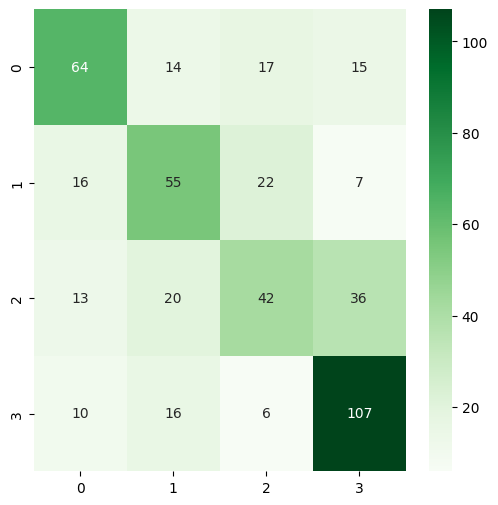

In [84]:
LR2 = LogisticRegression(penalty="l1", solver="saga", tol=0.01, max_iter=10000, random_state=0)
LR2.fit(X_train2,y_train2)
pred_LR2 = LR2.predict(X_test2)
Confusion_Matrix(confusion_matrix(y_test2,pred_LR2))
print(classification_report(y_test2, pred_LR2))
print(round(np.sum([y_test2==pred_LR2])/len(y_test2),4)*100,"%")
results.append(['histogram', 'Logistic Regression',round(np.sum([y_test2==pred_LR2])/len(y_test2),4)*100 ])

# RUN ON DATA SET WITH LINES, CIRCLES AND HISTOGRAM DATA

#### SVM

In [118]:
losses = ["hinge","squared_hinge"]
penalties = ["l1","l2"]

print("OneVsOneClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsOneClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train3, y_train3)
            pred_svm = svm.predict(X_test3)
            print(i,j,round(np.sum([y_test3==pred_svm])/len(y_test3),4)*100,"%")
        except:
            pass

print("OutputCodeClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OutputCodeClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train3, y_train3)
            pred_svm = svm.predict(X_test3)
            print(i,j,round(np.sum([y_test3==pred_svm])/len(y_test3),4)*100,"%")
        except:
            pass


print("OneVsRestClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsRestClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train3, y_train3)
            pred_svm = svm.predict(X_test3)
            print(i,j,round(np.sum([y_test3==pred_svm])/len(y_test3),4)*100,"%")
        except:
            pass


OneVsOneClassifier
hinge l2 47.61 %
squared_hinge l2 47.61 %
OutputCodeClassifier
hinge l2 37.61 %
squared_hinge l2 48.91 %
OneVsRestClassifier
hinge l2 31.96 %
squared_hinge l2 31.96 %


              precision    recall  f1-score   support

           0       0.42      0.35      0.38       110
           2       0.40      0.52      0.45       100
           9       0.38      0.30      0.34       111
          11       0.63      0.69      0.66       139

    accuracy                           0.48       460
   macro avg       0.46      0.46      0.46       460
weighted avg       0.47      0.48      0.47       460

47.61 %


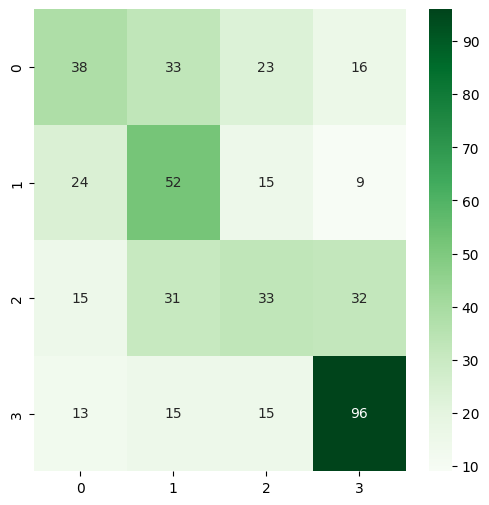

In [119]:
svm3 =  OneVsOneClassifier(LinearSVC(random_state=0, loss="hinge",penalty="l2")).fit(X_train3, y_train3)
pred_svm3 = svm3.predict(X_test3)
Confusion_Matrix(confusion_matrix(y_test3,pred_svm3))
print(classification_report(y_test3, pred_svm3))
print(round(np.sum([y_test3==pred_svm3])/len(y_test3),4)*100,"%")
results.append(['lines, circle, and histogram', 'SVM',round(np.sum([y_test3==pred_svm3])/len(y_test3),4)*100 ])

#### KNN

In [87]:
for i in range(3,101,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train3,y_train3)
    pred_knn = neigh.predict(X_test3)
    print(i,round(np.sum([y_test3==pred_knn])/len(y_test3),4)*100,"%")


3 49.57 %
5 47.17 %
7 47.83 %
9 47.39 %
11 47.39 %
13 48.04 %
15 47.83 %
17 47.83 %
19 48.04 %
21 47.17 %
23 46.300000000000004 %
25 46.089999999999996 %
27 45.87 %
29 47.61 %
31 46.52 %
33 46.300000000000004 %
35 44.13 %
37 44.57 %
39 45.0 %
41 45.43 %
43 43.91 %
45 43.480000000000004 %
47 43.26 %
49 45.0 %
51 44.57 %
53 42.61 %
55 43.04 %
57 43.91 %
59 43.7 %
61 42.39 %
63 42.17 %
65 42.17 %
67 41.089999999999996 %
69 40.43 %
71 40.22 %
73 40.22 %
75 40.43 %
77 40.22 %
79 40.22 %
81 40.87 %
83 40.43 %
85 39.35 %
87 37.830000000000005 %
89 38.48 %
91 38.48 %
93 39.57 %
95 38.48 %
97 38.04 %
99 37.169999999999995 %


              precision    recall  f1-score   support

           0       0.39      0.69      0.50       110
           2       0.48      0.41      0.44       100
           9       0.50      0.31      0.38       111
          11       0.71      0.55      0.62       139

    accuracy                           0.50       460
   macro avg       0.52      0.49      0.48       460
weighted avg       0.53      0.50      0.49       460

49.57 %


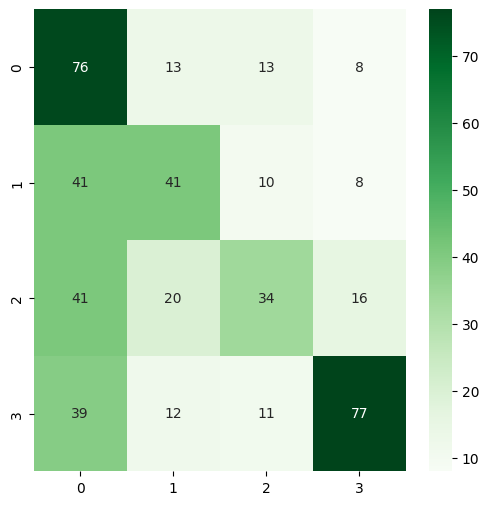

In [88]:
neigh3 = KNeighborsClassifier(n_neighbors=3)
neigh3.fit(X_train3,y_train3)
pred_knn3 = neigh3.predict(X_test3)
Confusion_Matrix(confusion_matrix(y_test3,pred_knn3))
print(classification_report(y_test3, pred_knn3))
print(round(np.sum([y_test3==pred_knn3])/len(y_test3),4)*100,"%")
results.append(['lines, circle, and histogram', 'KNN',round(np.sum([y_test3==pred_knn3])/len(y_test3),4)*100 ])

#### ADABOOST

In [89]:
for i in range(50,2001,50):
    ada = AdaBoostClassifier(n_estimators=i, algorithm="SAMME",random_state=0)
    ada.fit(X_train3,y_train3)
    pred_ada = ada.predict(X_test3)
    print(i,round(np.sum([y_test3==pred_ada])/len(y_test3),4)*100,"%")

50 56.089999999999996 %
100 55.43 %
150 56.3 %
200 56.089999999999996 %
250 58.48 %
300 57.60999999999999 %
350 56.96 %
400 56.96 %
450 57.38999999999999 %
500 59.13 %
550 59.57 %
600 58.91 %
650 59.57 %
700 58.48 %
750 59.35 %
800 60.0 %
850 58.48 %
900 58.91 %
950 60.0 %
1000 60.870000000000005 %
1050 60.42999999999999 %
1100 60.22 %
1150 59.78 %
1200 60.0 %
1250 60.22 %
1300 59.78 %
1350 59.57 %
1400 60.42999999999999 %
1450 60.650000000000006 %
1500 59.35 %
1550 61.3 %
1600 58.91 %
1650 59.35 %
1700 60.22 %
1750 59.78 %
1800 59.57 %
1850 60.650000000000006 %
1900 60.42999999999999 %
1950 61.09 %
2000 60.42999999999999 %


              precision    recall  f1-score   support

           0       0.56      0.67      0.61       110
           2       0.57      0.50      0.53       100
           9       0.55      0.59      0.57       111
          11       0.75      0.65      0.70       139

    accuracy                           0.61       460
   macro avg       0.61      0.61      0.60       460
weighted avg       0.62      0.61      0.61       460

61.09 %


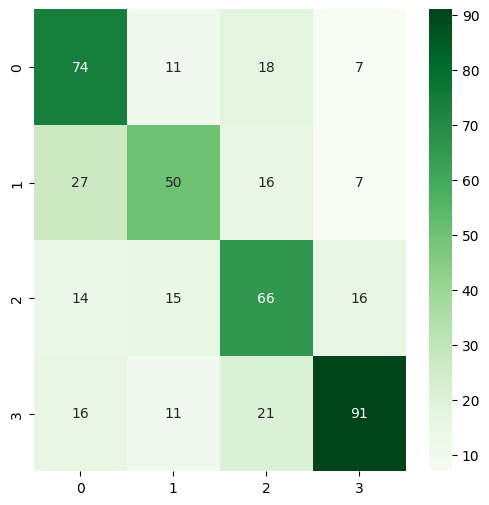

In [90]:
ada3 = AdaBoostClassifier(n_estimators=1950, algorithm="SAMME",random_state=0)
ada3.fit(X_train3,y_train3)
pred_ada3 = ada3.predict(X_test3)
Confusion_Matrix(confusion_matrix(y_test3,pred_ada3))
print(classification_report(y_test3, pred_ada3))
print(round(np.sum([y_test3==pred_ada3])/len(y_test3),4)*100,"%")
results.append(['lines, circle, and histogram', 'Adaboost',round(np.sum([y_test3==pred_ada3])/len(y_test3),4)*100 ])

#### RANDOM FOREST

In [91]:
for i in range(40,501,20):
    for j in range(2,5):
        RF = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=j, random_state=0)
        RF.fit(X_train3,y_train3)
        pred_RF = RF.predict(X_test3)
        print(i,j,round(np.sum([y_test3==pred_RF])/len(y_test3),4)*100,"%")

40 2 65.0 %
40 3 64.13 %
40 4 66.52 %
60 2 65.0 %
60 3 65.42999999999999 %
60 4 65.64999999999999 %
80 2 67.17 %
80 3 65.22 %
80 4 66.74 %
100 2 66.09 %
100 3 66.96 %
100 4 66.09 %
120 2 67.39 %
120 3 66.52 %
120 4 66.52 %
140 2 66.96 %
140 3 67.17 %
140 4 66.74 %
160 2 66.96 %
160 3 68.04 %
160 4 66.96 %
180 2 66.74 %
180 3 67.83 %
180 4 67.83 %
200 2 66.74 %
200 3 67.61 %
200 4 67.61 %
220 2 66.96 %
220 3 66.96 %
220 4 67.83 %
240 2 66.96 %
240 3 66.96 %
240 4 67.83 %
260 2 66.96 %
260 3 66.96 %
260 4 68.04 %
280 2 66.3 %
280 3 66.74 %
280 4 68.26 %
300 2 67.39 %
300 3 67.17 %
300 4 68.04 %
320 2 67.39 %
320 3 66.3 %
320 4 67.83 %
340 2 67.61 %
340 3 66.52 %
340 4 68.04 %
360 2 67.39 %
360 3 66.52 %
360 4 67.83 %
380 2 67.17 %
380 3 67.17 %
380 4 68.26 %
400 2 67.39 %
400 3 67.17 %
400 4 68.47999999999999 %
420 2 67.17 %
420 3 67.83 %
420 4 68.47999999999999 %
440 2 67.17 %
440 3 67.61 %
440 4 68.26 %
460 2 67.17 %
460 3 67.39 %
460 4 68.26 %
480 2 66.96 %
480 3 67.61 %
480 4 68.4799

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       110
           2       0.72      0.65      0.68       100
           9       0.59      0.64      0.61       111
          11       0.75      0.71      0.73       139

    accuracy                           0.68       460
   macro avg       0.69      0.68      0.68       460
weighted avg       0.69      0.68      0.69       460

68.47999999999999 %


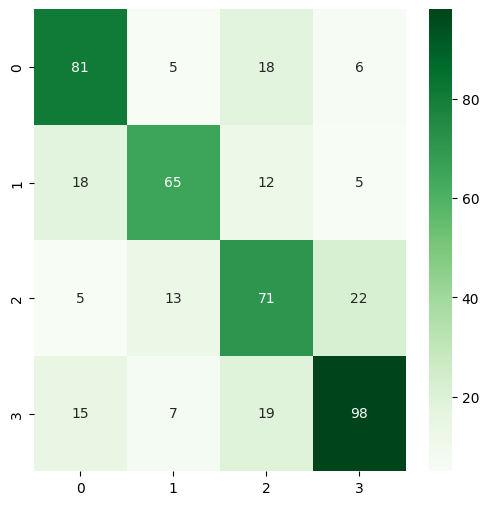

In [92]:
RF3 = RandomForestClassifier(n_estimators=400, max_depth=None,min_samples_split=4, random_state=0)
RF3.fit(X_train3,y_train3)
pred_RF3 = RF3.predict(X_test3)
Confusion_Matrix(confusion_matrix(y_test3,pred_RF3))
print(classification_report(y_test3, pred_RF3))
print(round(np.sum([y_test3==pred_RF3])/len(y_test3),4)*100,"%")
results.append(['lines, circle, and histogram', 'Random Forest',round(np.sum([y_test3==pred_RF3])/len(y_test3),4)*100 ])

#### LOGISTIC REGRESSION

In [93]:
penilties = ["l1","l2","elasticnet"]
solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
tols= [0.1 ,0.01, 0.001]

for i in penilties:
    for j in solvers:
        for k in tols:
            try:
                LR = LogisticRegression(penalty=i, solver=j, tol=k, max_iter=10000, random_state =0)
                LR.fit(X_train3,y_train3)
                pred_LR = LR.predict(X_test3)
                print(i,j,k,round(np.sum([y_test3==pred_LR])/len(y_test3),4)*100,"%")
            except:
                pass

l1 liblinear 0.1 56.74 %
l1 liblinear 0.01 53.04 %
l1 liblinear 0.001 50.870000000000005 %
l1 saga 0.1 52.61 %
l1 saga 0.01 56.3 %
l1 saga 0.001 55.22 %
l2 lbfgs 0.1 50.0 %
l2 lbfgs 0.01 50.0 %
l2 lbfgs 0.001 50.0 %
l2 liblinear 0.1 55.22 %
l2 liblinear 0.01 55.65 %
l2 liblinear 0.001 50.870000000000005 %
l2 newton-cg 0.1 48.04 %
l2 newton-cg 0.01 48.699999999999996 %
l2 newton-cg 0.001 48.699999999999996 %
l2 sag 0.1 55.43 %
l2 sag 0.01 56.089999999999996 %
l2 sag 0.001 55.43 %
l2 saga 0.1 52.61 %
l2 saga 0.01 56.3 %
l2 saga 0.001 55.22 %


              precision    recall  f1-score   support

           0       0.57      0.58      0.58       110
           2       0.55      0.51      0.53       100
           9       0.47      0.32      0.38       111
          11       0.62      0.79      0.69       139

    accuracy                           0.57       460
   macro avg       0.55      0.55      0.55       460
weighted avg       0.56      0.57      0.55       460

56.74 %


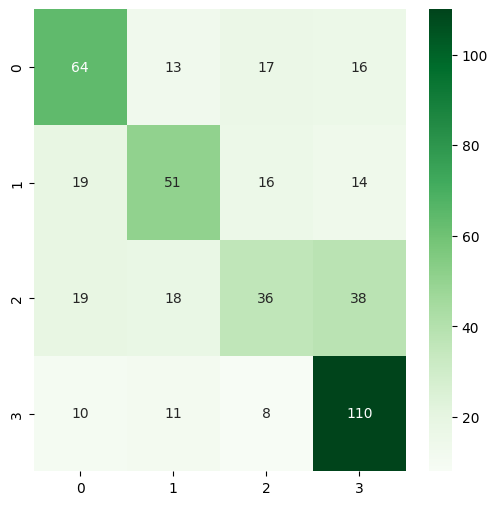

In [94]:
LR3 = LogisticRegression(penalty="l1", solver="liblinear", tol=0.1, max_iter=10000, random_state = 0)
LR3.fit(X_train3,y_train3)
pred_LR3 = LR3.predict(X_test3)
Confusion_Matrix(confusion_matrix(y_test3,pred_LR3))
print(classification_report(y_test3, pred_LR3))
print(round(np.sum([y_test3==pred_LR3])/len(y_test3),4)*100,"%")
results.append(['lines, circle, and histogram', 'Logistic Regression',round(np.sum([y_test3==pred_LR3])/len(y_test3),4)*100 ])

# RUN ON LINES CIRCLES AND HIST WITH PCA

In [95]:
pca1=PCA(n_components=0.99)
X_train4=pca1.fit_transform(X_train3)
X_test4=pca1.transform(X_test3)
y_train4 = y_train3
y_test4 = y_test3

In [96]:
print(X_train4.shape)
print(X_test4.shape)

(1073, 98)
(460, 98)


#### SVM

In [120]:
losses = ["hinge","squared_hinge"]
penalties = ["l1","l2"]

print("OneVsOneClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsOneClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train4, y_train4)
            pred_svm = svm.predict(X_test4)
            print(i,j,round(np.sum([y_test4==pred_svm])/len(y_test4),4)*100,"%")
        except:
            pass

print("OutputCodeClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OutputCodeClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train4, y_train4)
            pred_svm = svm.predict(X_test4)
            print(i,j,round(np.sum([y_test4==pred_svm])/len(y_test4),4)*100,"%")
        except:
            pass


print("OneVsRestClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsRestClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train4, y_train4)
            pred_svm = svm.predict(X_test4)
            print(i,j,round(np.sum([y_test4==pred_svm])/len(y_test4),4)*100,"%")
        except:
            pass


OneVsOneClassifier
hinge l2 37.830000000000005 %
squared_hinge l2 37.830000000000005 %
OutputCodeClassifier
hinge l2 34.57 %
squared_hinge l2 30.0 %
OneVsRestClassifier
hinge l2 35.0 %
squared_hinge l2 35.0 %


              precision    recall  f1-score   support

           0       0.32      0.53      0.40       110
           2       0.39      0.58      0.47       100
           9       0.42      0.23      0.29       111
          11       0.48      0.24      0.32       139

    accuracy                           0.38       460
   macro avg       0.40      0.39      0.37       460
weighted avg       0.41      0.38      0.36       460

37.830000000000005 %


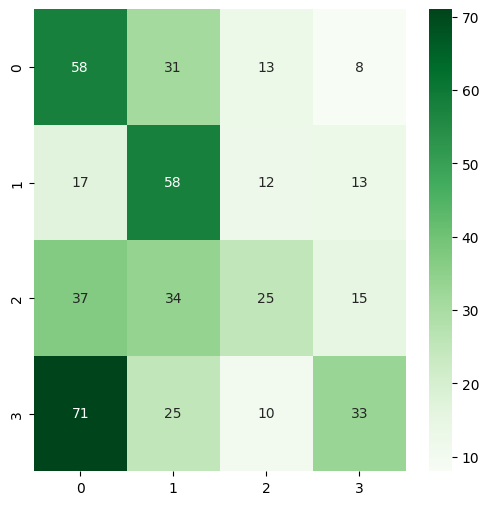

In [121]:
svm4 =  OneVsOneClassifier(LinearSVC(random_state=0, loss="hinge",penalty="l2")).fit(X_train4, y_train4)
pred_svm4 = svm4.predict(X_test4)
Confusion_Matrix(confusion_matrix(y_test4,pred_svm4))
print(classification_report(y_test4, pred_svm4))
print(round(np.sum([y_test4==pred_svm4])/len(y_test4),4)*100,"%")
results.append(['lines, circle, and histogram PCA 0.99', 'SVM',round(np.sum([y_test4==pred_svm4])/len(y_test4),4)*100 ])

#### KNN

In [99]:
for i in range(1,51):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train4,y_train4)
    pred_knn = neigh.predict(X_test4)
    print(i,round(np.sum([y_test4==pred_knn])/len(y_test4),4)*100,"%")

1 52.17 %
2 43.480000000000004 %
3 49.13 %
4 48.26 %
5 48.26 %
6 48.26 %
7 48.26 %
8 48.26 %
9 50.870000000000005 %
10 46.300000000000004 %
11 49.57 %
12 50.0 %
13 49.13 %
14 48.26 %
15 48.480000000000004 %
16 48.04 %
17 47.83 %
18 48.480000000000004 %
19 47.39 %
20 48.91 %
21 48.26 %
22 47.61 %
23 47.17 %
24 48.04 %
25 48.26 %
26 47.39 %
27 47.39 %
28 46.96 %
29 48.04 %
30 47.83 %
31 46.52 %
32 46.300000000000004 %
33 46.089999999999996 %
34 46.739999999999995 %
35 46.739999999999995 %
36 46.300000000000004 %
37 45.0 %
38 45.22 %
39 44.35 %
40 45.43 %
41 44.13 %
42 43.26 %
43 43.04 %
44 43.7 %
45 43.91 %
46 44.35 %
47 44.57 %
48 44.57 %
49 43.91 %
50 44.78 %


              precision    recall  f1-score   support

           0       0.50      0.53      0.51       110
           2       0.47      0.49      0.48       100
           9       0.43      0.35      0.39       111
          11       0.64      0.68      0.66       139

    accuracy                           0.52       460
   macro avg       0.51      0.51      0.51       460
weighted avg       0.52      0.52      0.52       460

52.17 %


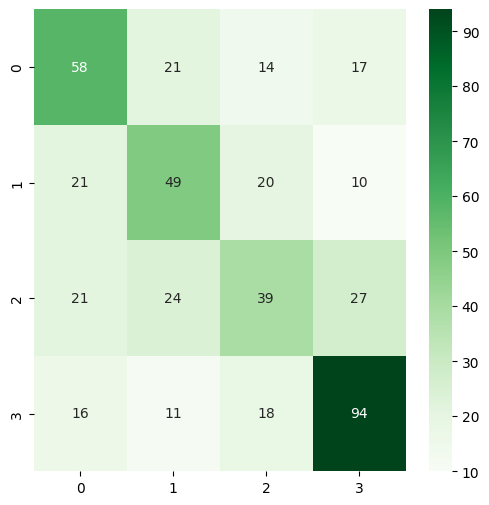

In [100]:
neigh4 = KNeighborsClassifier(n_neighbors=1)
neigh4.fit(X_train4,y_train4)
pred_knn4 = neigh4.predict(X_test4)
Confusion_Matrix(confusion_matrix(y_test4,pred_knn4))
print(classification_report(y_test4, pred_knn4))
print(round(np.sum([y_test4==pred_knn4])/len(y_test4),4)*100,"%")
results.append(['lines, circle, and histogram PCA 0.99', 'KNN',round(np.sum([y_test4==pred_knn4])/len(y_test4),4)*100 ])

#### Adaboost

In [101]:
for i in range(50,2001,50):
    ada = AdaBoostClassifier(n_estimators=i, algorithm="SAMME",random_state=0)
    ada.fit(X_train4,y_train4)
    pred_ada = ada.predict(X_test4)
    print(i,round(np.sum([y_test4==pred_ada])/len(y_test4),4)*100,"%")

50 52.39 %
100 52.39 %
150 51.739999999999995 %
200 52.17 %
250 55.00000000000001 %
300 55.22 %
350 55.65 %
400 56.089999999999996 %
450 56.96 %
500 55.65 %
550 56.089999999999996 %
600 57.830000000000005 %
650 56.74 %
700 55.22 %
750 56.52 %
800 58.040000000000006 %
850 57.17 %
900 56.3 %
950 56.3 %
1000 56.74 %
1050 56.74 %
1100 56.52 %
1150 56.3 %
1200 55.87 %
1250 56.74 %
1300 55.43 %
1350 55.87 %
1400 54.35 %
1450 54.56999999999999 %
1500 54.779999999999994 %
1550 55.00000000000001 %
1600 54.56999999999999 %
1650 55.00000000000001 %
1700 54.35 %
1750 55.00000000000001 %
1800 55.22 %
1850 55.43 %
1900 55.65 %
1950 56.089999999999996 %
2000 55.87 %


              precision    recall  f1-score   support

           0       0.58      0.63      0.61       110
           2       0.58      0.45      0.51       100
           9       0.46      0.56      0.50       111
          11       0.70      0.65      0.67       139

    accuracy                           0.58       460
   macro avg       0.58      0.57      0.57       460
weighted avg       0.59      0.58      0.58       460

57.830000000000005 %


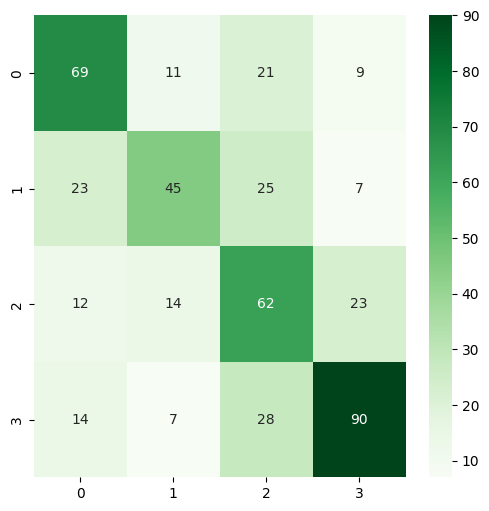

In [102]:
ada4 = AdaBoostClassifier(n_estimators=600, algorithm="SAMME",random_state=0)
ada4.fit(X_train4,y_train4)
pred_ada4 = ada4.predict(X_test4)
Confusion_Matrix(confusion_matrix(y_test4,pred_ada4))
print(classification_report(y_test4, pred_ada4))
print(round(np.sum([y_test4==pred_ada4])/len(y_test4),4)*100,"%")
results.append(['lines, circle, and histogram PCA 0.99', 'Adaboost',round(np.sum([y_test4==pred_ada4])/len(y_test4),4)*100 ])

#### Random Forest

In [103]:
for i in range(40,501,20):
    for j in range(2,5):
        RF = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=j, random_state=0)
        RF.fit(X_train4,y_train4)
        pred_RF = RF.predict(X_test4)
        print(i,j,round(np.sum([y_test4==pred_RF])/len(y_test4),4)*100,"%")

40 2 60.650000000000006 %
40 3 58.26 %
40 4 57.60999999999999 %
60 2 60.22 %
60 3 60.0 %
60 4 58.040000000000006 %
80 2 60.22 %
80 3 60.22 %
80 4 58.48 %
100 2 60.42999999999999 %
100 3 58.91 %
100 4 59.13 %
120 2 60.0 %
120 3 60.22 %
120 4 59.13 %
140 2 60.22 %
140 3 59.78 %
140 4 59.13 %
160 2 60.0 %
160 3 60.22 %
160 4 60.42999999999999 %
180 2 60.42999999999999 %
180 3 60.0 %
180 4 59.78 %
200 2 60.22 %
200 3 60.0 %
200 4 59.57 %
220 2 60.650000000000006 %
220 3 61.3 %
220 4 60.0 %
240 2 60.870000000000005 %
240 3 60.22 %
240 4 59.78 %
260 2 61.519999999999996 %
260 3 60.42999999999999 %
260 4 60.22 %
280 2 61.96 %
280 3 60.870000000000005 %
280 4 60.650000000000006 %
300 2 61.3 %
300 3 60.650000000000006 %
300 4 61.3 %
320 2 61.3 %
320 3 61.09 %
320 4 60.870000000000005 %
340 2 61.3 %
340 3 61.09 %
340 4 60.650000000000006 %
360 2 61.3 %
360 3 60.870000000000005 %
360 4 60.870000000000005 %
380 2 61.519999999999996 %
380 3 60.870000000000005 %
380 4 60.650000000000006 %
400 2 61.0

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       110
           2       0.61      0.56      0.58       100
           9       0.53      0.56      0.54       111
          11       0.66      0.70      0.68       139

    accuracy                           0.62       460
   macro avg       0.62      0.62      0.62       460
weighted avg       0.63      0.62      0.62       460

62.39 %


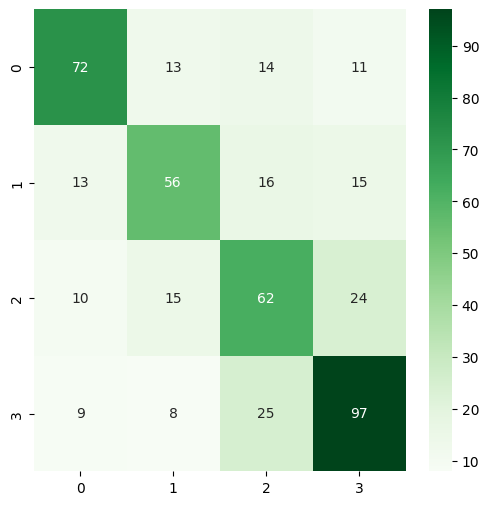

In [104]:
RF4 = RandomForestClassifier(n_estimators=460, max_depth=None,min_samples_split=3, random_state=0)
RF4.fit(X_train4,y_train4)
pred_RF4 = RF4.predict(X_test4)
Confusion_Matrix(confusion_matrix(y_test4,pred_RF4))
print(classification_report(y_test4, pred_RF4))
print(round(np.sum([y_test4==pred_RF4])/len(y_test4),4)*100,"%")
results.append(['lines, circle, and histogram PCA 0.99', 'Random Forest',round(np.sum([y_test4==pred_RF4])/len(y_test4),4)*100 ])

#### Logistic Regression

In [105]:
penilties = ["l1","l2","elasticnet"]
solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
tols= [0.1 ,0.01, 0.001]

for i in penilties:
    for j in solvers:
        for k in tols:
            try:
                LR = LogisticRegression(penalty=i, solver=j, tol=k, max_iter=10000, random_state =0)
                LR.fit(X_train4,y_train4)
                pred_LR = LR.predict(X_test4)
                print(i,j,k,round(np.sum([y_test4==pred_LR])/len(y_test4),4)*100,"%")
            except:
                pass

l1 liblinear 0.1 55.65 %
l1 liblinear 0.01 55.65 %
l1 liblinear 0.001 55.00000000000001 %
l1 saga 0.1 53.04 %
l1 saga 0.01 54.13 %
l1 saga 0.001 55.22 %
l2 lbfgs 0.1 51.519999999999996 %
l2 lbfgs 0.01 51.519999999999996 %
l2 lbfgs 0.001 51.519999999999996 %
l2 liblinear 0.1 51.300000000000004 %
l2 liblinear 0.01 50.870000000000005 %
l2 liblinear 0.001 51.959999999999994 %
l2 newton-cg 0.1 50.43 %
l2 newton-cg 0.01 50.43 %


c:\Users\nechd\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\nechd\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


l2 newton-cg 0.001 50.43 %
l2 sag 0.1 53.910000000000004 %
l2 sag 0.01 54.35 %
l2 sag 0.001 53.910000000000004 %
l2 saga 0.1 53.04 %
l2 saga 0.01 54.13 %
l2 saga 0.001 55.22 %


              precision    recall  f1-score   support

           0       0.59      0.56      0.58       110
           2       0.48      0.47      0.48       100
           9       0.50      0.37      0.42       111
          11       0.60      0.76      0.67       139

    accuracy                           0.56       460
   macro avg       0.54      0.54      0.54       460
weighted avg       0.55      0.56      0.55       460

55.65 %


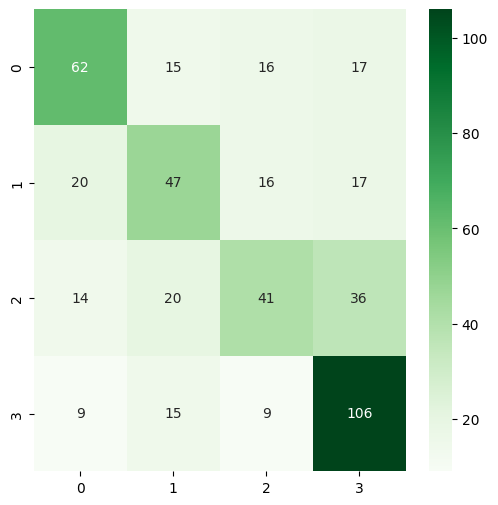

In [106]:
LR4 = LogisticRegression(penalty="l1", solver="liblinear", tol=0.1, max_iter=10000, random_state = 0)
LR4.fit(X_train4,y_train4)
pred_LR4 = LR4.predict(X_test4)
Confusion_Matrix(confusion_matrix(y_test4,pred_LR4))
print(classification_report(y_test4, pred_LR4))
print(round(np.sum([y_test4==pred_LR4])/len(y_test4),4)*100,"%")
results.append(['lines, circle, and histogram PCA 0.99', 'Logistic Regression',round(np.sum([y_test4==pred_LR4])/len(y_test4),4)*100 ])

In [107]:
cols = ["df_type","classifier","accuracy"]
df = pd.DataFrame(results, columns=cols)

In [108]:
df

,df_type,classifier,accuracy
0,lines and circles,SVM,38.04
1,lines and circles,KNN,39.57
2,lines and circles,Adaboost,43.26
3,lines and circles,Random Forest,43.04
4,lines and circles,Logistic Regression,37.17
5,histogram,SVM,48.70
6,histogram,KNN,49.78
7,histogram,Adaboost,60.00
8,histogram,Random Forest,67.39
9,histogram,Logistic Regression,58.26


In [122]:

filenames = ['svm1.sav','svm2.sav','svm3.sav','svm4.sav','knn1.sav','knn2.sav','knn3.sav','knn4.sav',
             'ada1.sav','ada2.sav','ada3.sav','ada4.sav','RF1.sav','RF2.sav','RF3.sav','RF4.sav',
             'LR1.sav','LR2.sav','LR3.sav','LR4.sav']
models= [svm1,svm2,svm3,svm4,neigh1,neigh2,neigh3,neigh4,
         ada1,ada2,ada3,ada4,RF1,RF2,RF3,RF4,LR1,LR2,LR3,LR4]

for i in range(len(filenames)): 
    pickle.dump(models[i], open(filenames[i], 'wb'))

In [12]:
svm3 = pickle.load(open('svm3.sav', 'rb'))
neigh3 = pickle.load(open('knn3.sav', 'rb'))
ada3 = pickle.load(open('ada3.sav', 'rb'))
RF3 = pickle.load(open('RF3.sav', 'rb'))
LR3 = pickle.load(open('LR3.sav', 'rb'))

In [41]:
# combo model

weights=[47.61,49.57,61.09,68.48,56.74]
normalizer = 1 / float(sum(weights) )
for i in range(len(weights)):
    weights[i] = normalizer * weights[i]
# print(weights)



svm3.fit(X_train3,y_train3)
pred_svm3= svm3.predict(X_test3)

neigh3.fit(X_train3,y_train3)
pred_knn3= neigh3.predict(X_test3)

ada3.fit(X_train3,y_train3)
pred_ada3= ada3.predict(X_test3)

RF3.fit(X_train3,y_train3)
pred_RF3= RF3.predict(X_test3)

LR3.fit(X_train3,y_train3)
pred_LR3= LR3.predict(X_test3)


In [45]:
# def most_frequent(List):
#     occurence_count = Counter(List)
    
#     return occurence_count.most_common(1)[0][0]

def find_best(l,weight):
    classes = [0]*12
    ws = [0]*12
    for i in range(len(l)):
        classes[l[i]]+=1
        ws[l[i]]+=weight[i]

    best = -1
    maxx = -1
    for i in range(len(ws)):
        if ws[i]>maxx:
            maxx = ws[i]
            best = i
    return best



    

In [49]:
over_all=[]
preds=[pred_svm3,pred_knn3,pred_ada3,pred_RF3,pred_LR3]
for i in range(len(y_test3)):
    p=[]
    for j in preds:
        p.append(j[i])
    over_all.append(p)
   

final_pred =[]
for i in over_all:
    c = find_best(i,weights)
    final_pred.append(c)
    print(i,c)
# print(final_pred)

[9, 9, 2, 9, 11] 9
[0, 0, 0, 0, 0] 0
[0, 0, 0, 0, 11] 0
[2, 2, 2, 2, 2] 2
[11, 0, 2, 0, 11] 0
[9, 11, 9, 9, 9] 9
[0, 0, 2, 9, 2] 2
[11, 0, 11, 11, 11] 11
[11, 2, 0, 11, 11] 11
[9, 11, 11, 11, 11] 11
[9, 0, 9, 9, 11] 9
[2, 0, 0, 2, 0] 0
[9, 0, 9, 2, 9] 9
[11, 0, 11, 11, 11] 11
[2, 9, 2, 2, 2] 2
[0, 0, 9, 9, 2] 9
[11, 11, 9, 9, 11] 11
[0, 0, 0, 0, 0] 0
[2, 0, 2, 2, 2] 2
[2, 2, 0, 0, 0] 0
[11, 11, 0, 0, 11] 11
[9, 9, 0, 0, 0] 0
[11, 9, 0, 0, 0] 0
[9, 0, 0, 0, 9] 0
[2, 2, 2, 2, 2] 2
[9, 11, 9, 9, 9] 9
[9, 0, 9, 9, 0] 9
[11, 0, 9, 9, 11] 9
[2, 2, 9, 9, 2] 2
[11, 9, 9, 9, 11] 9
[2, 0, 11, 11, 11] 11
[9, 9, 2, 9, 9] 9
[2, 0, 2, 2, 2] 2
[2, 0, 2, 2, 0] 2
[11, 11, 9, 11, 11] 11
[11, 2, 11, 11, 11] 11
[11, 11, 11, 11, 11] 11
[9, 9, 2, 2, 9] 9
[0, 0, 2, 2, 0] 0
[11, 11, 11, 9, 11] 11
[11, 11, 9, 11, 11] 11
[2, 9, 9, 9, 9] 9
[11, 9, 9, 9, 11] 9
[11, 2, 11, 11, 11] 11
[0, 0, 0, 0, 0] 0
[0, 0, 0, 0, 0] 0
[0, 9, 0, 0, 2] 0
[2, 11, 2, 2, 11] 2
[11, 11, 9, 9, 11] 11
[11, 11, 11, 11, 11] 11
[9, 0, 0, 9,

              precision    recall  f1-score   support

           0       0.62      0.72      0.66       110
           2       0.64      0.59      0.61       100
           9       0.60      0.53      0.56       111
          11       0.76      0.78      0.77       139

    accuracy                           0.66       460
   macro avg       0.66      0.65      0.65       460
weighted avg       0.66      0.66      0.66       460

66.3 %


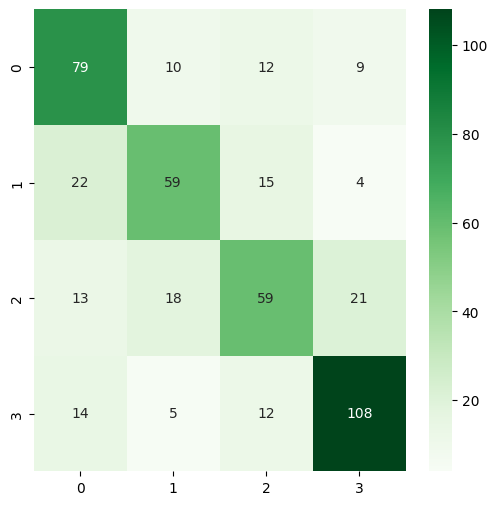

In [44]:
Confusion_Matrix(confusion_matrix(y_test3,final_pred))
print(classification_report(y_test3, final_pred))
print(round(np.sum([y_test3==final_pred])/len(y_test3),4)*100,"%")
# results.append(['lines, circle, and histogram PCA 0.99', 'Logistic Regression',round(np.sum([y_test4==pred_LR4])/len(y_test4),4)*100 ])

In [109]:

# import necessary packages 
# import cv2 
# import numpy as np
# import matplotlib.pyplot as plt 
# import math
  
# # load image 
# image = cv2.imread('boxes 1.jpg',cv2.COLOR_BGR2RGB) 
# # cv2.imshow("image",image)
# # cv2.waitKey(0) 

# # histogram color https://pyimagesearch.com/2021/04/28/opencv-image-histograms-cv2-calchist/


# # chans = cv2.split(image)
# # colors = ("b", "g", "r")
# # plt.figure()
# # plt.title("'Flattened' Color Histogram")
# # plt.xlabel("Bins")
# # plt.ylabel("# of Pixels")
# # # loop over the image channels
# # for (chan, color) in zip(chans, colors):
# # 	# create a histogram for the current channel and plot it
# # 	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
# # 	plt.plot(hist, color=color)
# # 	plt.xlim([0, 256])
# # plt.show()


# #https://datacarpentry.org/image-processing/05-creating-histograms.html

# histogram_r, bin_edges = np.histogram(image[:, :, 0], bins=256, range=(0, 256)) 
# print(histogram_r)
# histogram_g, bin_edges = np.histogram(image[:, :, 1], bins=256, range=(0, 256)) 
# print(histogram_g)
# histogram_b, bin_edges = np.histogram(image[:, :, 2], bins=256, range=(0, 256)) 
# print(histogram_b)

# for i in histogram_r:
#     print(i)


# # # edges canny https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html
	
# # edges = cv2.Canny(image,100,200)
# # plt.subplot(121),plt.imshow(image)
# # plt.title('Original Image'), plt.xticks([]), plt.yticks([])
# # plt.subplot(122),plt.imshow(edges,cmap = 'gray')
# # plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
# # plt.show()


# # # hough line https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html
# dst = cv2.Canny(image, 50, 200, None, 3)
# cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)

# lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
# print(lines.shape)
# print(len(lines))

# print(image.flatten())
# print(dst.flatten())
# # if lines is not None:
# #     for i in range(0, len(lines)):
# #         rho = lines[i][0][0]
# #         theta = lines[i][0][1]
# #         a = math.cos(theta)
# #         b = math.sin(theta)
# #         x0 = a * rho
# #         y0 = b * rho
# #         pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
# #         pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))

# #         plt.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
# # plt.show()

# # # #hough circle https://pyimagesearch.com/2014/07/21/detecting-circles-images-using-opencv-hough-circles/

# # output = image.copy()
# # cv2.imshow("output",output)
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# gray = cv2.medianBlur(gray, 5)
# rows = gray.shape[0]
# circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
#                 param1=100, param2=30,
#                 minRadius=20, maxRadius=200)
# # circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2, 100)
# print(circles.shape[1])
# # # if circles is not None:
# # # 	# convert the (x, y) coordinates and radius of the circles to integers
# # # 	circles = np.round(circles[0, :]).astype("int")
# # # 	# loop over the (x, y) coordinates and radius of the circles
# # # 	for (x, y, r) in circles:
# # # 		# draw the circle in the output image, then draw a rectangle
# # # 		# corresponding to the center of the circle
# # # 		cv2.circle(output, (x, y), r, (0, 255, 0), 4)
# # # 		cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
# # # 	# show the output image
# # # cv2.imshow("output",output)
# # # cv2.waitKey(0) 
# # # cv2.imshow("output", np.hstack([image, output]))
# # # cv2.waitKey(0) 

